# Team Members
    Abijith M G
    Shripad Hegde
    Anand P
    Christy Joseph
    

In [1]:
# !pip install xgboost

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm
from sklearn.externals import joblib
%matplotlib inline

D:\Softwares\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data

### Connecting Server

In [4]:
db_host = '18.136.56.185:3306'
username = 'dm_team'
user_pass = 'dm_team123#'
db_name = 'project_itsm'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['dataset_list']

### Importing Data

In [5]:
query="select * from dataset_list;"
data=pd.read_sql(query,conn)
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


# Source Code

### Exploratory Data Analysis 

In [6]:
data.shape

(46606, 25)

In [7]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [8]:
data.head(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [9]:
# Looking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
CI_Name                       46606 non-null object
CI_Cat                        46606 non-null object
CI_Subcat                     46606 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      46606 non-null object
number_cnt                    46606 non-null object
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46606 non-null object
Open_Time                     46606 non-null object
Reopen_Time                   46606 non-null object
Resolved_Time                 46606 non-null object
Close_T

## Data Processing

- CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.

In [51]:

data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)


In [11]:

data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [12]:

data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

In [50]:
data.head(4)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,


## 1. Predicting Priorities

#### Feature Selection

- Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [13]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [52]:
X.head(3)

,CI_Cat,CI_Subcat,WBS,Category
0,6,17,137,1
1,1,17,70,1
2,1,5,74,3


In [15]:
# Label Encoding
enc= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [16]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [17]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train.shape

(32624, 4)

In [19]:
X_test.shape

(13982, 4)

# Models

### 1. Support Vector Machine(SVM)

In [20]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [21]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [22]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7296524102417393
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.65      0.56       210
           3       0.53      0.33      0.41      1581
           4       0.70      0.90      0.79      6829
           5       0.87      0.68      0.76      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.73     13982
   macro avg       0.43      0.43      0.42     13982
weighted avg       0.72      0.73      0.71     13982



In [23]:
confusion_matrix(y_test,y_predict_svm)


array([[   0,    0,    0,    1,    0,    0],
       [   0,  137,    9,   55,    9,    0],
       [   0,   36,  529,  914,  102,    0],
       [   0,   80,  201, 6162,  386,    0],
       [   0,   10,  112, 1440, 3374,    0],
       [   0,   12,  144,  253,   16,    0]], dtype=int64)

### 2. Decision Tree

In [24]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [26]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))


0.8090401945358318
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.69      0.59       210
           3       0.66      0.64      0.65      1581
           4       0.81      0.91      0.85      6829
           5       0.88      0.80      0.84      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.81     13982
   macro avg       0.48      0.51      0.49     13982
weighted avg       0.79      0.81      0.80     13982



In [27]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  144,    6,   43,   17,    0],
       [   0,   42, 1011,  408,  120,    0],
       [   0,   68,  202, 6194,  365,    0],
       [   0,   12,   55,  906, 3963,    0],
       [   0,   12,  268,  118,   27,    0]], dtype=int64)

### 3. Random Forest

In [28]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=27, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [30]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8085395508510943
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.66      0.58       210
           3       0.66      0.63      0.65      1581
           4       0.81      0.91      0.85      6829
           5       0.88      0.80      0.84      4936
          NA       0.27      0.01      0.01       425

    accuracy                           0.81     13982
   macro avg       0.52      0.50      0.49     13982
weighted avg       0.80      0.81      0.80     13982



In [31]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  139,   10,   44,   17,    0],
       [   0,   38, 1003,  411,  124,    5],
       [   0,   66,  198, 6192,  371,    2],
       [   0,   11,   51,  905, 3968,    1],
       [   0,   12,  262,  117,   31,    3]], dtype=int64)

### 4. K-Nearest Neighbor

In [32]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [33]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [34]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8001001287369475
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.00      0.01       210
           3       0.65      0.63      0.64      1581
           4       0.79      0.91      0.85      6829
           5       0.86      0.81      0.84      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.80     13982
   macro avg       0.55      0.39      0.39     13982
weighted avg       0.78      0.80      0.78     13982



In [35]:
confusion_matrix(y_test,y_predict_knn)


array([[   0,    0,    0,    1,    0,    0],
       [   0,    1,    7,  180,   22,    0],
       [   0,    0,  992,  444,  143,    2],
       [   0,    0,  201, 6194,  434,    0],
       [   0,    0,   57,  879, 4000,    0],
       [   0,    0,  269,  130,   26,    0]], dtype=int64)

### 5. XGBoost Classifier

In [36]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [38]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.7820054355600057
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.53      0.65      0.59       210
           3       0.64      0.46      0.53      1581
           4       0.77      0.91      0.83      6829
           5       0.86      0.78      0.82      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.78     13982
   macro avg       0.47      0.47      0.46     13982
weighted avg       0.76      0.78      0.76     13982



In [39]:
confusion_matrix(y_test,y_predict_xgb)


array([[   0,    0,    0,    1,    0,    0],
       [   0,  137,    7,   51,   15,    0],
       [   0,   36,  722,  637,  186,    0],
       [   0,   64,  155, 6202,  408,    0],
       [   0,   10,   37, 1016, 3873,    0],
       [   0,   11,  212,  169,   33,    0]], dtype=int64)

### 6. Artificial Neural Network

In [40]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [42]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7498211986840223
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.65      0.58       210
           3       0.56      0.43      0.49      1581
           4       0.73      0.90      0.80      6829
           5       0.87      0.72      0.79      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.75     13982
   macro avg       0.45      0.45      0.44     13982
weighted avg       0.73      0.75      0.73     13982



In [43]:
confusion_matrix(y_test,y_predict_mlp)


array([[   0,    0,    0,    1,    0,    0],
       [   0,  137,   11,   51,   11,    0],
       [   0,   36,  676,  758,  111,    0],
       [   0,   67,  236, 6116,  410,    0],
       [   0,   10,   93, 1278, 3555,    0],
       [   0,   11,  183,  214,   17,    0]], dtype=int64)

In [44]:
# Exporting the trained model
joblib.dump(model_rf,'Predicting_Priority.ml')

['Predicting_Priority.ml']

## 2. Predicting Request For Change (RFC)

#### Feature Selection

In [45]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [46]:
X1.head(3)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4,incident,1,2
1,Web Based Application,WBS000088,3,incident,1,1
2,Desktop Application,WBS000092,NA,request for information,1,


In [47]:
enc= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [48]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [49]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

ValueError: could not convert string to float: 'NA'

In [53]:
X1_train.shape


(32624, 6)

In [54]:
X1_test.shape


(13982, 6)

## Models

### 1. Desicion Tree

In [55]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

ValueError: could not convert string to float: 'NA'

In [ ]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

In [ ]:
confusion_matrix(y1_test,y1_predict_dtree)


### 3. Random Forest

In [57]:
# Trainiong the Model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

ValueError: could not convert string to float: 'NA'

In [ ]:
# Predictiong the model
y1_predict_rf = model1_rf.predict(X1_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

In [ ]:
confusion_matrix(y1_test,y1_predict_rf)

In [ ]:
# Exporting the trained model
joblib.dump(model1_dtree,'Predict_RFC.ml')

### 3. Forecasting the Incident Volume

In [59]:
# Imporing the necessary columns
incfrq = data.loc[:,['Incident_ID','Open_Time']]

In [60]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


#### Data Processing/ Data Mugging

In [61]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()


In [62]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [63]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [64]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [66]:
incfrq.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [68]:
# Setting Date as the Index
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [69]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [70]:
# Checking the range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [71]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [72]:
data1.head()


Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

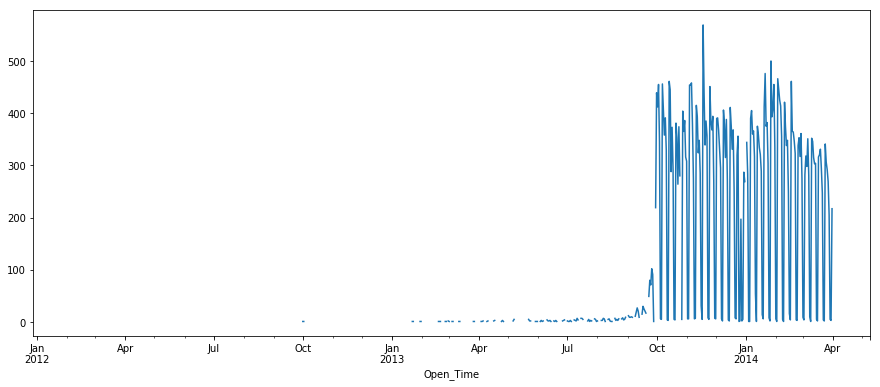

In [73]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [74]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [75]:
incfrom2013.head()


,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [76]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

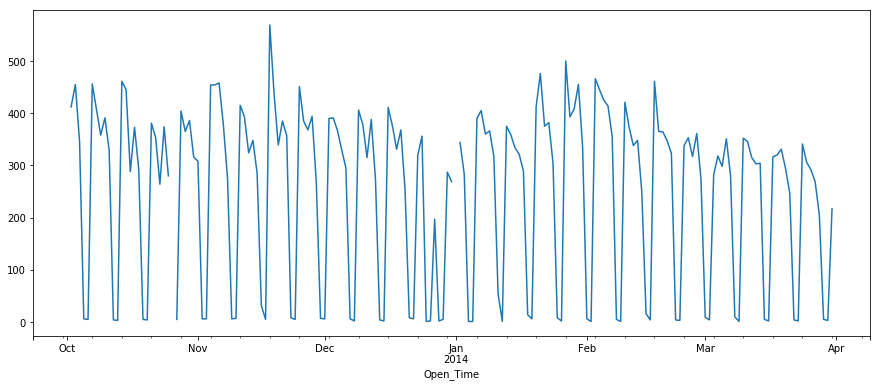

In [77]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [78]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [79]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.7853824722415
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363338175497
ARIMA(1, 0, 0) - AIC:2365.2916469365928
ARIMA(1, 0, 1) - AIC:2337.3125086933524
ARIMA(1, 1, 0) - AIC:2373.1280680651544
ARIMA(1, 1, 1) - AIC:2294.4315812436917


In [80]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.791      2.576      0.010    6023.396    4.44e+04


In [81]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
2014-03-08    267.0
2014-03-09    174.0
2014-03-10    169.0
2014-03-11    289.0
2014-03-12    288.0
2014-03-13    277.0
2014-03-14    273.0
2014-03-15    274.0
2014-03-16    171.0
2014-03-17    169.0
2014-03-18    276.0
2014-03-19    278.0
2014-03-20    282.0
2014-03-21    269.0
2014-03-22    253.0
2014-03-23    170.0
2014-03-24    168.0
2014-03-25    284.0
2014-03-26    272.0
2014-03-27    267.0
2014-03-28    260.0
2014-03-29    238.0
2014-03-30    169.0
2014-03-31    167.0
2014-04-01    240.0
              ...  
2014-10-01    252.0
2014-10-02    252.0
2014-10-03    252.0
2014-10-04    252.0
2014-10-05    252.0
2014-10-06    252.0
2014-10-07    252.0
2014-10-08    252.0
2014-10-09    252.0
2014-10-10    252.0
2014-10-11    252.0
2014-10-12    252.0
2014-10-13    252.0
2014-10-14    252.0
2014-10-15    252.0
2014-10-16    252.0
2014-10-17    252.0
2014-10-18    252.0
2014-10-19    252.0


### Visualization

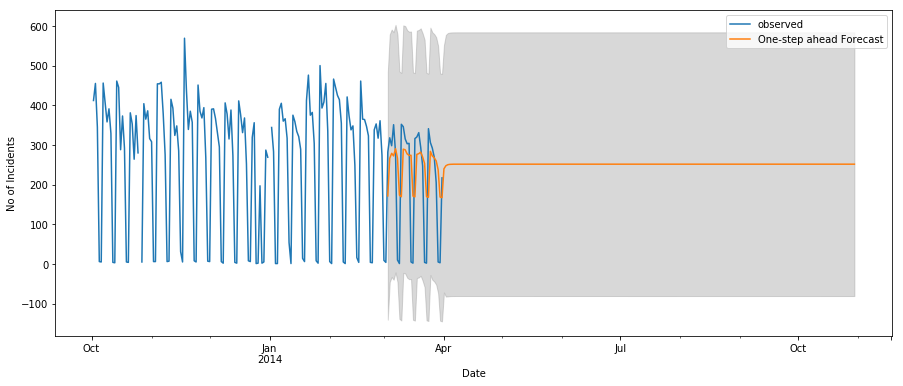

In [82]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

In [ ]:
pwd